&nbsp;

# Geographic Heat map of City of Toronto

&nbsp;
***

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

&nbsp;
## 1. Read data
&nbsp;

In [9]:
print('')
print('')
data = pd.read_csv('forAnalysis/data.csv')
data.sample(5)

,neighbourhood
2490,Waterfront Communities-The Island
1493,High Park North
163,Stonegate-queensway
1282,Mount Olive-silverstone-jamestown
2762,Newtonbrook East


&nbsp;
## 2. Read Shape File
&nbsp;

In [10]:
nb = 'forAnalysis/Neighbourhoods/Neighbourhoods.shp'
regions = gpd.read_file(nb)
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()
regions.sample(5)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,neighbourhood
40,2141,25886730,25926702,49885,4,4,Rexdale-Kipling (4),Rexdale-Kipling (4),None,None,-79.566228,43.723725,16492145,4.801397e+06,9788.586534,"POLYGON ((-79.5551162536014 43.71510245969922,...",rexdale-kipling
97,2198,25886906,25926759,49885,75,75,Church-Yonge Corridor (75),Church-Yonge Corridor (75),None,None,-79.379017,43.659649,16493057,2.609014e+06,8785.416375,POLYGON ((-79.37671693899888 43.66241886314259...,church-yonge corridor
58,2159,25886965,25926720,49885,81,81,Trinity-Bellwoods (81),Trinity-Bellwoods (81),None,None,-79.415342,43.650176,16492433,3.306038e+06,7385.141049,POLYGON ((-79.42241029552947 43.64349155758946...,trinity-bellwoods
105,2206,25886489,25926767,49885,126,126,Dorset Park (126),Dorset Park (126),None,None,-79.278908,43.759274,16493185,1.153256e+07,14645.384509,POLYGON ((-79.29442504040593 43.77272685096512...,dorset park
90,2191,25886663,25926752,49885,41,41,Bridle Path-Sunnybrook-York Mills (41),Bridle Path-Sunnybrook-York Mills (41),None,None,-79.378904,43.731013,16492945,1.693914e+07,21666.018365,POLYGON ((-79.39007651184855 43.72768216572467...,bridle path-sunnybrook-york mills


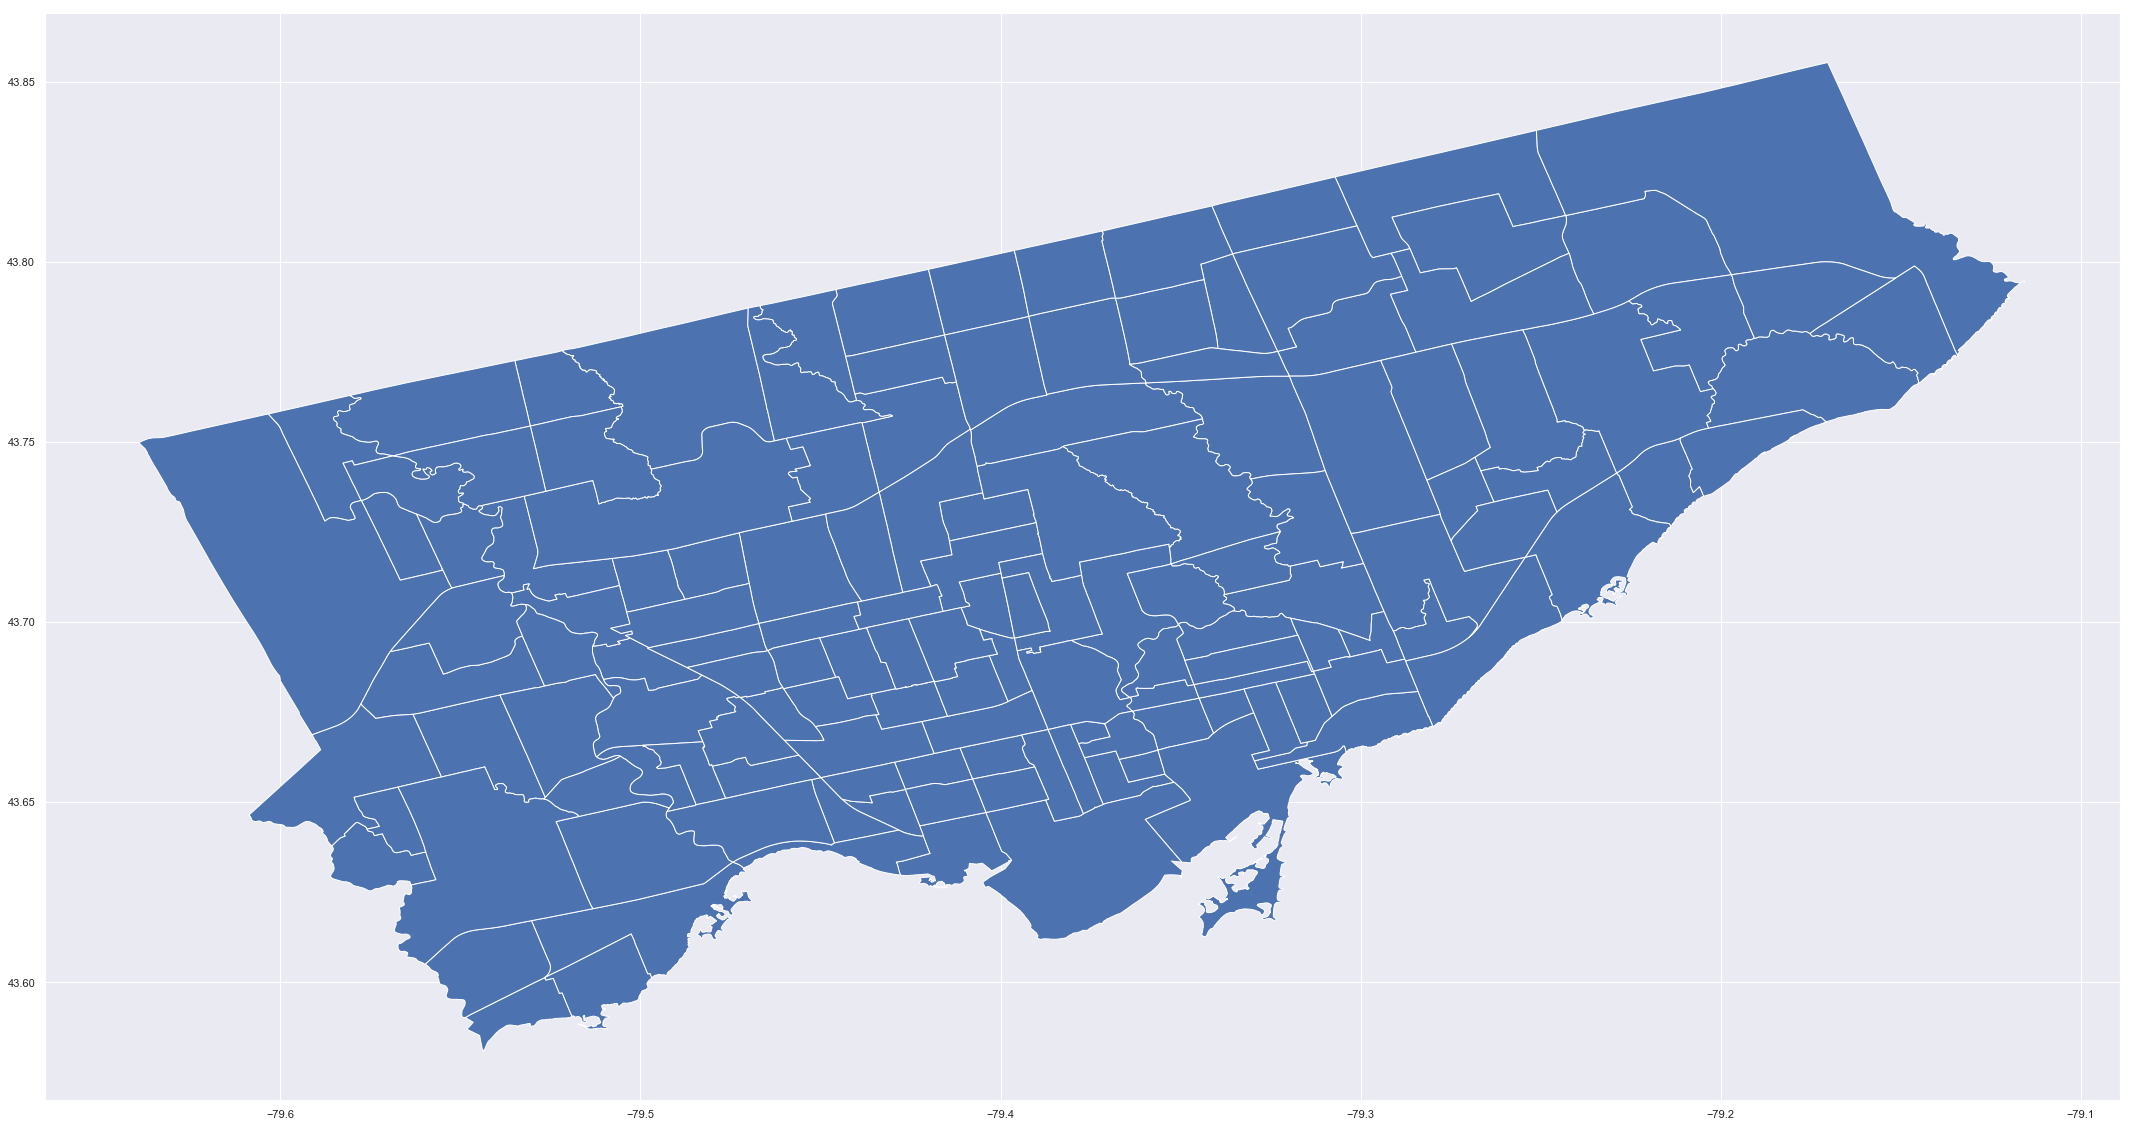

In [11]:
regions.plot(figsize=(40,20))
plt.show()

&nbsp;
## 3. Group By Neighbourhood and Count
&nbsp;

In [12]:
print('')
print('')
data['count'] = 1
dataByNeighbourhood = data.groupby('neighbourhood').count()[['count']].reset_index()
dataByNeighbourhood['neighbourhood'] = dataByNeighbourhood['neighbourhood'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

,neighbourhood,count
114,waterfront communities-the island,231
86,niagara,144
76,mimico,128
121,willowdale east,125
22,church-yonge corridor,102
6,bay street corridor,91
57,islington-city centre west,78
72,malvern,54
7,bayview village,53
82,mount pleasant west,49


&nbsp;
## 4. Join The Dataset with Shape File
&nbsp;

In [13]:
# Join the dataset with the available mapping files.
# We will fill in the neighbourhoods which were not present in the dataset with 0.
# this way we will still see the neighbourhood in the map, but no housing will be shown on it.
merged = regions.set_index('neighbourhood').join(dataByNeighbourhood.set_index('neighbourhood'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'count']].sample(5)


,neighbourhood,FIELD_11,FIELD_12,geometry,count
99,clanton park,-79.446303,43.741978,POLYGON ((-79.43370575757966 43.73614639592323...,16.0
96,centennial scarborough,-79.150843,43.782376,POLYGON ((-79.14511222063859 43.76637226606705...,8.0
40,rexdale-kipling,-79.566228,43.723725,"POLYGON ((-79.5551162536014 43.71510245969922,...",5.0
116,flemingdon park,-79.332646,43.715930,POLYGON ((-79.33790580188732 43.70769889179611...,19.0
91,broadview north,-79.355630,43.688825,POLYGON ((-79.34627355846912 43.68272388183031...,3.0


&nbsp;
## 5. Plot the Map
&nbsp;

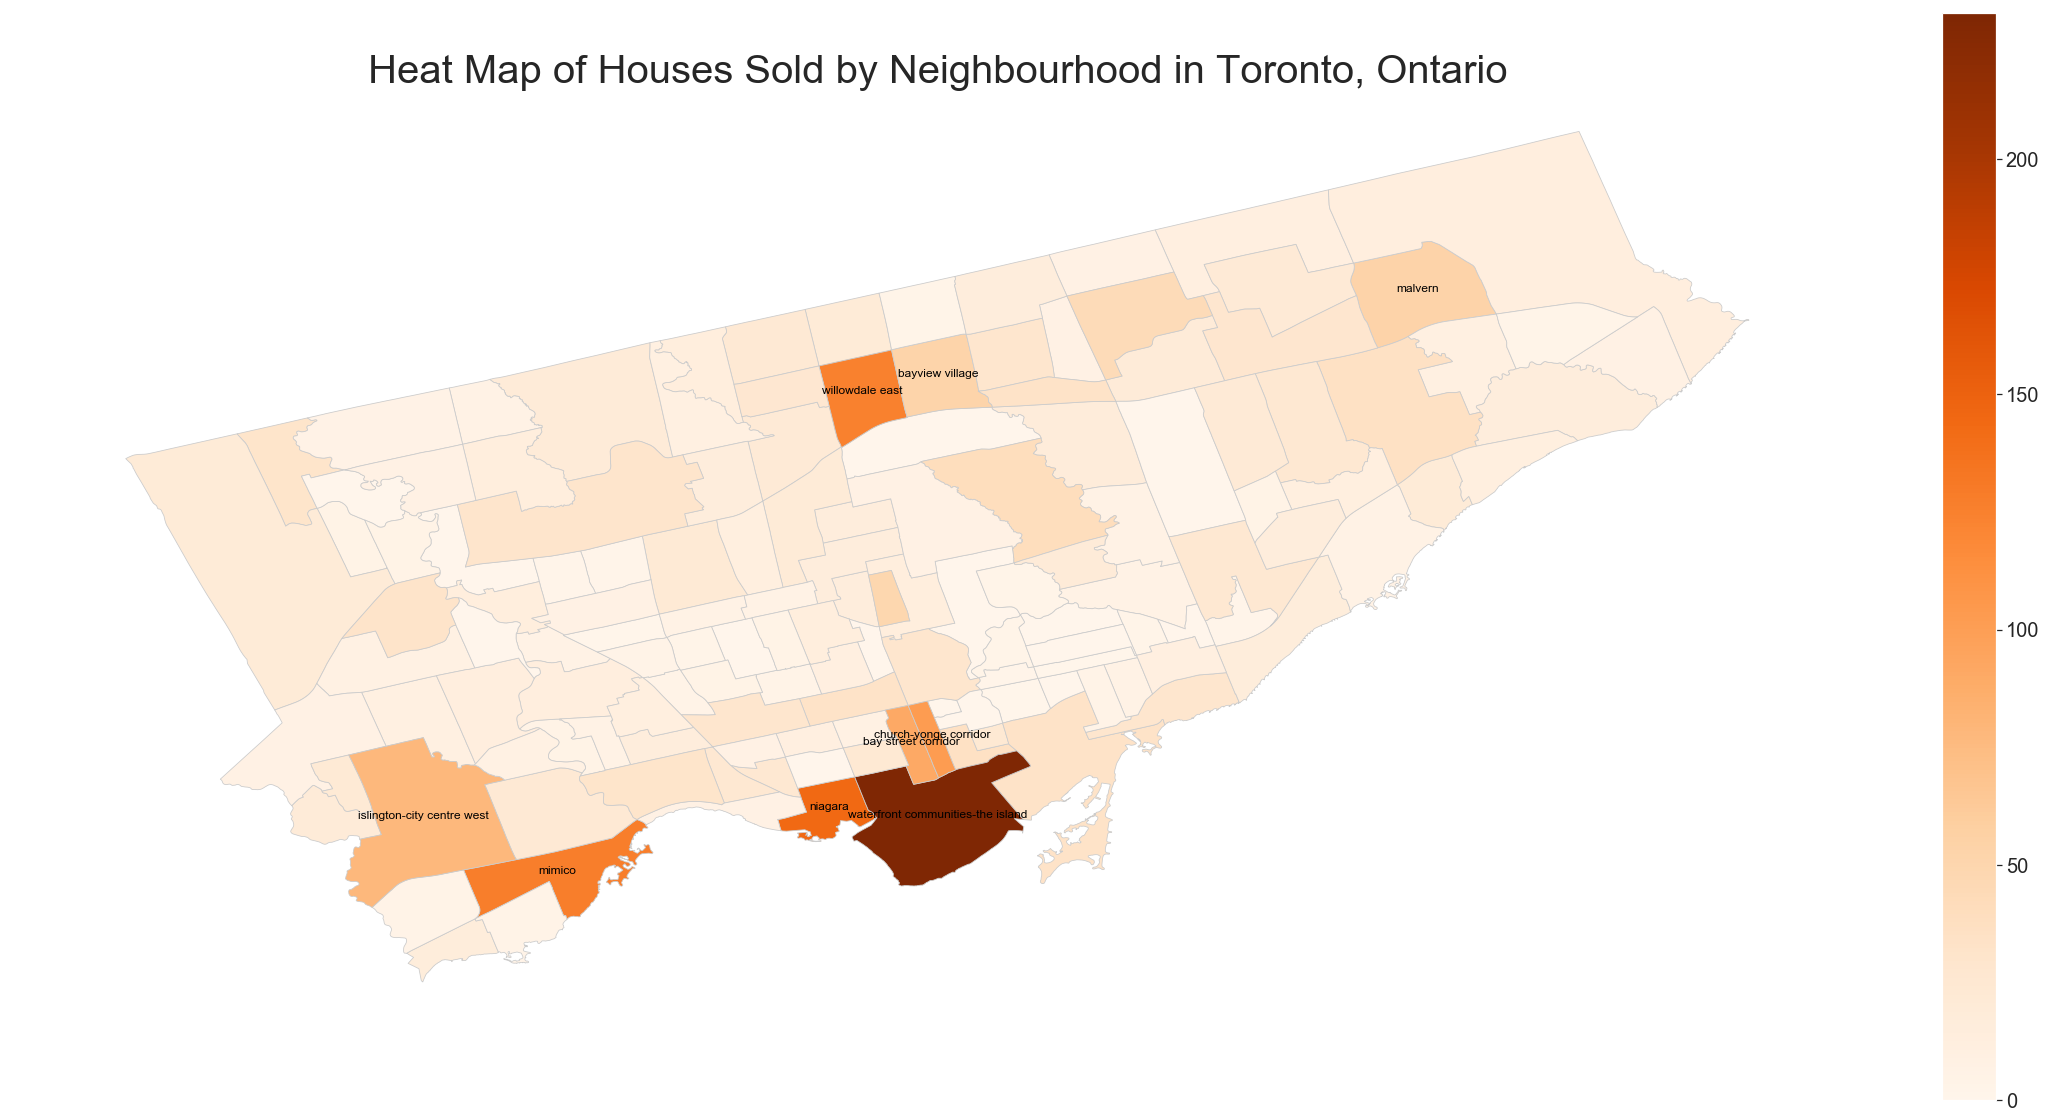

In [14]:
# we are using the maximum and minimum count values from the previous cell.
# setting additionally properties for the plot such as titles, turning of the axis for better visibility
# and setting the color scheme to look like a heat map.
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Houses Sold by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})


# Create colorbar as a legend
# empty array for the data range
# add the colorbar to the figure
# set the color bar label text size
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 50 houses sold
merged.plot('count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['count'] > 50):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()